<h1> Initialisation Cell</h1>

In [54]:
import numpy as np
import pandas as pd
import re
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import math

<h1> Importing the Data</h1>

In [55]:
dataset = pd.read_csv("logbook_assignment1.csv")
dataset.info()
dataset

/usr/local/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174870 entries, 0 to 1174869
Data columns (total 9 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   date_fueled      1125700 non-null  object
 1   date_captured    1174870 non-null  object
 2   odometer         1025716 non-null  object
 3   gallons          1100660 non-null  object
 4   cost_per_gallon  1094110 non-null  object
 5   total_spent      1100660 non-null  object
 6   mpg              1100660 non-null  object
 7   miles            146274 non-null   object
 8   user_url         1174870 non-null  object
dtypes: object(9)
memory usage: 80.7+ MB


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url
0,"Cooling System, Heating System, Lights, Spark ...",Apr 7 2022,"73,370",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...
1,Nov 7 2012,Aug 30 2016,"11,983",12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150
2,Sep 22 2012,Sep 28 2012,"98,233",7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...
3,May 4 2019,May 4 2019,"163,802",10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233
4,Feb 15 2022,Feb 15 2022,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...
...,...,...,...,...,...,...,...,...,...
1174865,Feb 19 2020,Feb 19 2020,"118,237",13.046,$1.999,$26.08,25.7,NaN,https://www.somewebsite.com/volkswagen/beetle/...
1174866,Dec 6 2019,Dec 6 2019,"141,761",12.637,$2.449,$30.95,20,NaN,https://www.somewebsite.com/toyota/avalon/2000...
1174867,Oct 4 2021,Oct 4 2021,"65,029",10.002,$3.449,$34.50,28.5,NaN,https://www.somewebsite.com/fiat/500/2013/909694
1174868,Jul 26 2021,Jul 26 2021,"15,255",10.493,$3.539,$37.13,36.5,NaN,https://www.somewebsite.com/mini/cooper/2019/9...


<h1>Helper Functions</h1>

<h1>Data Cleaning</h1>

<h2>1.date_fueled</h2>

In [56]:
dataset["date_fueled"] = dataset["date_fueled"].str.replace(" ","-")
dataset["date_fueled"] = dataset["date_fueled"].str.replace("Jan","01")
dataset["date_fueled"] = dataset["date_fueled"].str.replace("Feb","02")
dataset["date_fueled"] = dataset["date_fueled"].str.replace("Mar","03")
dataset["date_fueled"] = dataset["date_fueled"].str.replace("Apr","04")
dataset["date_fueled"] = dataset["date_fueled"].str.replace("May","05")
dataset["date_fueled"] = dataset["date_fueled"].str.replace("Jun","06")
dataset["date_fueled"] = dataset["date_fueled"].str.replace("Jul","07")
dataset["date_fueled"] = dataset["date_fueled"].str.replace("Aug","08")
dataset["date_fueled"] = dataset["date_fueled"].str.replace("Sep","09")
dataset["date_fueled"] = dataset["date_fueled"].str.replace("Oct","10")
dataset["date_fueled"] = dataset["date_fueled"].str.replace("Nov","11")
dataset["date_fueled"] = dataset["date_fueled"].str.replace("Dec","12")
dataset["date_fueled"] = pd.to_datetime(dataset["date_fueled"],format='%m-%d-%Y',errors='coerce')

In [57]:
today = date.today()

print("The date_fueled entries that were in the future or that are earlier than 2005:")


#Years below 2005
idx = np.where(pd.DatetimeIndex(dataset['date_fueled']).year <= 2005)
display(dataset["date_fueled"].iloc[idx])

#Future dates
idx2 = np.where(pd.DatetimeIndex(dataset['date_fueled']).date >= today)
display(dataset["date_fueled"].iloc[idx2])

print("Entries that were in the future or that are earlier than 2005 constitute ",((len(idx[0])+len(idx2[0]))/dataset.shape[0])*100,"% of the dataset")

dataset.drop(idx[0], axis=0, inplace=True)
dataset.drop(idx2[0], axis=0, inplace=True)



The date_fueled entries that were in the future or that are earlier than 2005:


6953      2001-05-24
7568      1997-09-29
10812     2003-09-22
14771     2002-08-21
16159     1997-08-15
             ...    
1170218   2002-02-21
1170962   2000-03-12
1171685   2002-02-21
1172630   2001-05-06
1173873   2003-03-07
Name: date_fueled, Length: 688, dtype: datetime64[ns]

63905     2027-11-17
149865    2025-04-20
272941    2025-08-09
317064    2030-07-10
439193    2027-10-10
503983    2024-12-10
517188    2023-01-02
554936    2028-06-07
631252    2028-05-09
640350    2024-11-10
772677    2022-05-10
789614    2025-04-19
813760    2028-08-10
819005    2023-01-26
866309    2024-04-20
877449    2029-12-09
879772    2022-12-01
911075    2030-04-07
932935    2028-09-09
938007    2024-12-07
1001628   2029-03-10
1029376   2030-04-09
1086018   2030-11-08
1092503   2022-06-15
1100247   2022-12-26
1162369   2023-03-08
Name: date_fueled, dtype: datetime64[ns]

Entries that were in the future or that are earlier than 2005 constitute  0.06077268123281725 % of the dataset


In [58]:
#Years below 2005
idx = np.where(pd.DatetimeIndex(dataset['date_fueled']).year <= 2005)
display(dataset["date_fueled"].iloc[idx])

#Future dates
idx2 = np.where(pd.DatetimeIndex(dataset['date_fueled']).date >= today)
display(dataset["date_fueled"].iloc[idx2])

print('Entries that were in the future or that are earlier than 2005 have been removed')

Series([], Name: date_fueled, dtype: datetime64[ns])

Series([], Name: date_fueled, dtype: datetime64[ns])

Entries that were in the future or that are earlier than 2005 have been removed


In [59]:
print("The unique value count for the date_fueled column is given by:")
unique_values = dataset["date_fueled"].isnull()

unique_values_count = dataset["date_fueled"].value_counts(dropna=False)
display(unique_values_count)
u_count = len(np.where(unique_values == True)[0])
print("\n")
print("The number of invalid dates = ",u_count)
print("The percentage of invalid dates = ",(u_count/dataset.shape[0])*100,"%")

The unique value count for the date_fueled column is given by:


NaT           137209
2022-04-09      2375
2022-04-08      2283
2022-04-10      2165
2022-04-01      2029
               ...  
2007-02-15         1
2006-06-03         1
2007-10-28         1
2008-03-25         1
2006-06-18         1
Name: date_fueled, Length: 5530, dtype: int64



The number of invalid dates =  137209
The percentage of invalid dates =  11.685755555479851 %


The unique value count by year for the date_fueled column is given by:


<AxesSubplot:title={'center':'Unique value count by year for the date_fueled'}, ylabel='Year'>

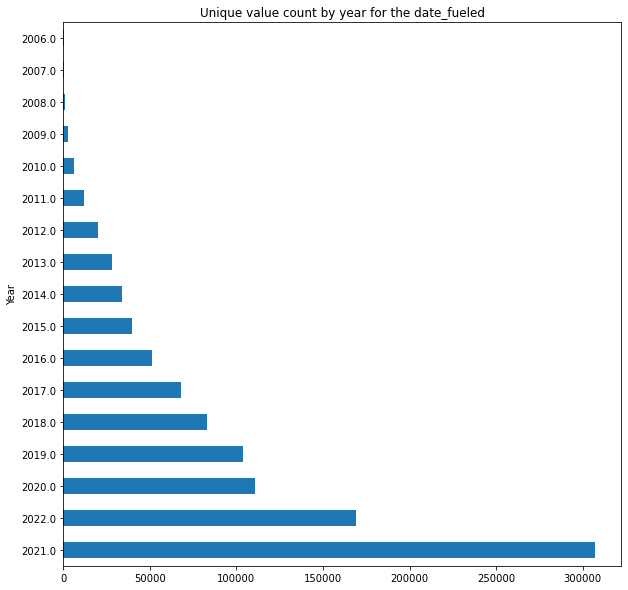

In [60]:
print("The unique value count by year for the date_fueled column is given by:")
year = pd.DatetimeIndex(dataset['date_fueled']).year.value_counts()
year.plot.barh(figsize=(10,10) , title='Unique value count by year for the date_fueled', ylabel='Year')

The unique value count by month for the date_fueled column is given by:


<AxesSubplot:title={'center':'Unique value count by month'}, ylabel='Month'>

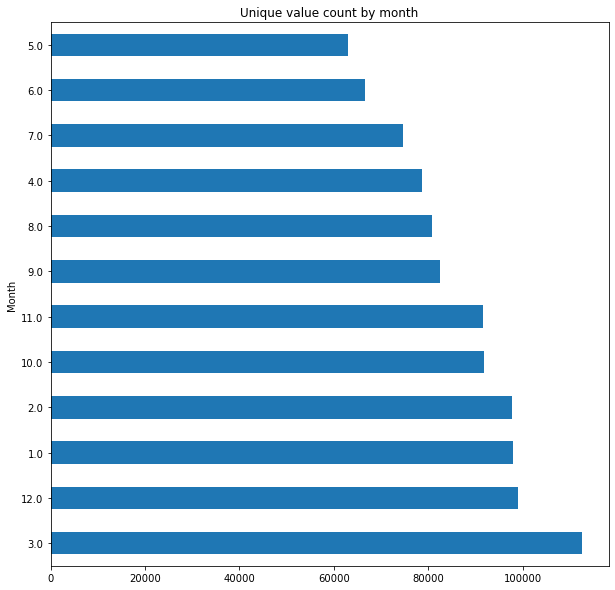

In [61]:
print("The unique value count by month for the date_fueled column is given by:")
year = pd.DatetimeIndex(dataset['date_fueled']).month.value_counts()
year.plot.barh(figsize=(10,10), title='Unique value count by month', ylabel='Month')

The unique value count by day for the date_fueled column is given by:


<AxesSubplot:title={'center':'Unique value count by day'}, ylabel='Day'>

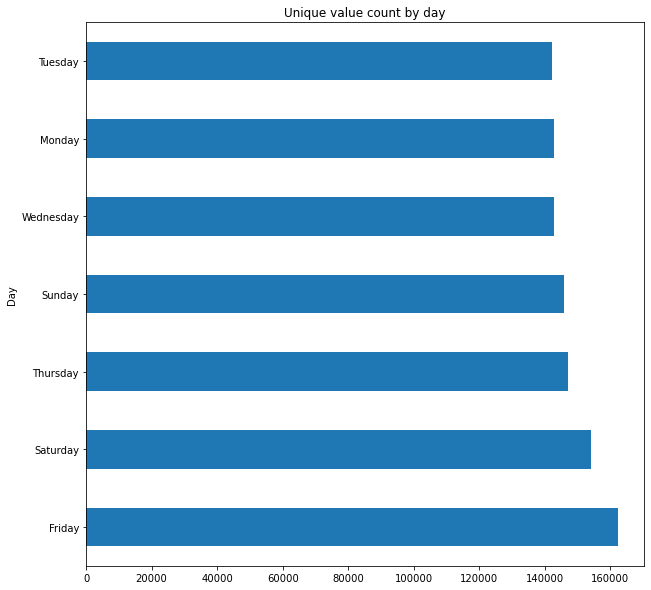

In [62]:
print("The unique value count by day for the date_fueled column is given by:")
days = dataset["date_fueled"].dt.day_name()
days.value_counts().plot.barh(figsize=(10,10),title='Unique value count by day',ylabel='Day')

<h3>Conclusion</h3>

<p>After completing the necessary processing, we obtain the following information:/p>

<ul>
    <li>The invalid dates constitute 11.685765507961046% of the dataset</li>
    <li>Entries that were in the future or that are earlier than 2005 constitute  0.06085779703286321 % of the dataset</li>
    <li> As the years progress more users refuel their vehicles with 2021 being the year with the most users refueling their vehicles. This indicates as the years progress more individuals have been purchasing vehicles.</li>
    <li> The month of March(i.e 3.0) is the month in which most users were refueling their vehicles.</li>
    <li> Most users refueled their vehicles on a Friday and Saturday. This could be due to the fact that most individual travel from Friday and Saturday</li>
</ul>

<h2>2.Date_captured</h2>

In [63]:
dataset["date_captured"] = dataset["date_captured"].str.replace(" ","-")
dataset["date_captured"] = dataset["date_captured"].str.replace("Jan","01")
dataset["date_captured"] = dataset["date_captured"].str.replace("Feb","02")
dataset["date_captured"] = dataset["date_captured"].str.replace("Mar","03")
dataset["date_captured"] = dataset["date_captured"].str.replace("Apr","04")
dataset["date_captured"] = dataset["date_captured"].str.replace("May","05")
dataset["date_captured"] = dataset["date_captured"].str.replace("Jun","06")
dataset["date_captured"] = dataset["date_captured"].str.replace("Jul","07")
dataset["date_captured"] = dataset["date_captured"].str.replace("Aug","08")
dataset["date_captured"] = dataset["date_captured"].str.replace("Sep","09")
dataset["date_captured"] = dataset["date_captured"].str.replace("Oct","10")
dataset["date_captured"] = dataset["date_captured"].str.replace("Nov","11")
dataset["date_captured"] = dataset["date_captured"].str.replace("Dec","12")
dataset["date_captured"] = pd.to_datetime(dataset["date_captured"],format='%m-%d-%Y',errors='coerce')
dataset["date_captured"]


0         2022-04-07
1         2016-08-30
2         2012-09-28
3         2019-05-04
4         2022-02-15
             ...    
1174865   2020-02-19
1174866   2019-12-06
1174867   2021-10-04
1174868   2021-07-26
1174869   2019-03-12
Name: date_captured, Length: 1174156, dtype: datetime64[ns]

In [64]:
today = date.today()

print("The date_captured entries that were in the future or that are earlier than 2005:")


#Years below 2005
idx = np.where(pd.DatetimeIndex(dataset['date_captured']).year <= 2005)
display(dataset["date_captured"].iloc[idx])

#Future dates
idx2 = np.where(pd.DatetimeIndex(dataset['date_captured']).date >= today)
display(dataset["date_captured"].iloc[idx2])

print("Entries that were in the future or that are earlier than 2005 constitute ",((len(idx[0])+len(idx2[0]))/dataset.shape[0])*100,"% of the dataset")

dataset.drop(idx[0], axis=0, inplace=True)
dataset.drop(idx2[0], axis=0, inplace=True)

The date_captured entries that were in the future or that are earlier than 2005:


Series([], Name: date_captured, dtype: datetime64[ns])

Series([], Name: date_captured, dtype: datetime64[ns])

Entries that were in the future or that are earlier than 2005 constitute  0.0 % of the dataset


In [65]:
print("The unique value count for the date_captured column is given by:")
unique_values = dataset["date_captured"].isnull()
display(dataset["date_captured"].value_counts(dropna=False))
u_count = len(np.where(unique_values == True)[0])

print("\n")
print("The number of invalid dates = ",u_count)
print("The percentage of invalid dates = ",(u_count/dataset.shape[0])*100,"%")

The unique value count for the date_captured column is given by:


2016-08-31    4346
2017-03-06    3363
2016-09-01    3311
2022-04-09    2888
2022-04-10    2737
              ... 
2008-10-18       1
2008-08-17       1
2009-08-13       1
2008-12-26       1
2009-01-29       1
Name: date_captured, Length: 4999, dtype: int64



The number of invalid dates =  0
The percentage of invalid dates =  0.0 %


The unique value count by year for the date_captured column is given by:


<AxesSubplot:title={'center':'Unique value count by year for the date_captured'}, ylabel='Year'>

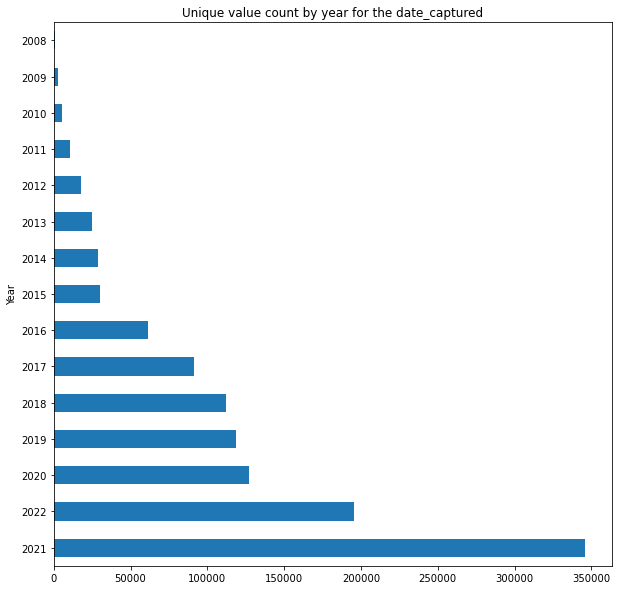

In [66]:
print("The unique value count by year for the date_captured column is given by:")
year = pd.DatetimeIndex(dataset['date_captured']).year.value_counts()
year.plot.barh(figsize=(10,10) , title='Unique value count by year for the date_captured', ylabel='Year')

The unique value count by month for the date_captured column is given by:


<AxesSubplot:title={'center':'Unique value count by month'}, ylabel='Month'>

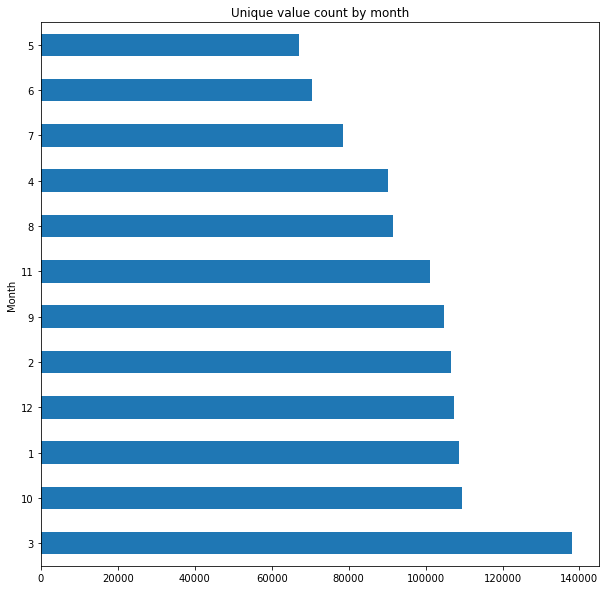

In [67]:
print("The unique value count by month for the date_captured column is given by:")
month = pd.DatetimeIndex(dataset['date_captured']).month.value_counts()
month.plot.barh(figsize=(10,10), title='Unique value count by month', ylabel='Month')

The unique value count by day for the date_captured column is given by:


<AxesSubplot:title={'center':'Unique value count by day'}, ylabel='Day'>

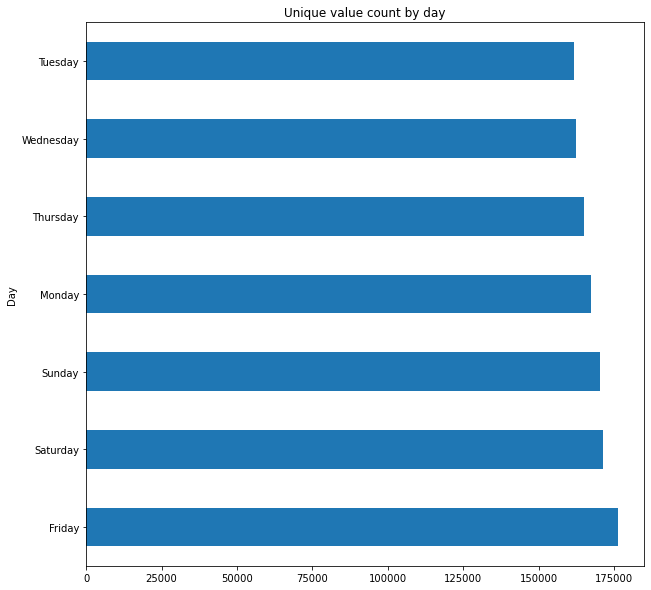

In [68]:
print("The unique value count by day for the date_captured column is given by:")
days = dataset["date_captured"].dt.day_name()
days.value_counts().plot.barh(figsize=(10,10),title='Unique value count by day',ylabel='Day')

<h3>Conclusion</h3>

<h2>3.Odometer</h2>

In [69]:
#Remove the delimiter
dataset["odometer"] = dataset["odometer"].str.replace(",","")
dataset["odometer"]

0           73370 
1           11983 
2           98233 
3          163802 
4              NaN
            ...   
1174865    118237 
1174866    141761 
1174867     65029 
1174868     15255 
1174869    204774 
Name: odometer, Length: 1174156, dtype: object

In [70]:
#Convert to appropriate dtype(i.e float64)
dataset["odometer"] = pd.to_numeric(dataset['odometer'],errors = 'coerce')
dataset["odometer"]

0           73370.0
1           11983.0
2           98233.0
3          163802.0
4               NaN
             ...   
1174865    118237.0
1174866    141761.0
1174867     65029.0
1174868     15255.0
1174869    204774.0
Name: odometer, Length: 1174156, dtype: float64

In [71]:
#Assess number of missing values
NaN_count = dataset["odometer"].isna().sum()
print("The odometer column consist of ",NaN_count," missing values which constitute ",(NaN_count/dataset['odometer'].shape[0])*100,"% of the odometer column")

The odometer column consist of  149004  missing values which constitute  12.69030690981437 % of the odometer column


In [72]:
#Provide Statistical Summary of odometer column
display(dataset["odometer"].describe())

count    1.025152e+06
mean     1.040020e+05
std      3.406155e+05
min      0.000000e+00
25%      4.592400e+04
50%      9.188700e+04
75%      1.469260e+05
max      2.543621e+08
Name: odometer, dtype: float64

<h2>4.Gallons</h2>

In [73]:
#Remove the delimiter
dataset["gallons"] = dataset["gallons"].str.replace(",","")
dataset["gallons"]

0             NaN
1          12.120
2           7.991
3          10.575
4          11.651
            ...  
1174865    13.046
1174866    12.637
1174867    10.002
1174868    10.493
1174869    17.350
Name: gallons, Length: 1174156, dtype: object

In [74]:
#Convert to appropriate dtype(i.e float64)
dataset["gallons"] = pd.to_numeric(dataset['gallons'],errors = 'coerce')
dataset["gallons"]

0             NaN
1          12.120
2           7.991
3          10.575
4          11.651
            ...  
1174865    13.046
1174866    12.637
1174867    10.002
1174868    10.493
1174869    17.350
Name: gallons, Length: 1174156, dtype: float64

In [75]:
#Provide Statistical Summary of odometer column
display(dataset["gallons"].describe())

count    1.038672e+06
mean     1.282238e+01
std      7.663733e+01
min      0.000000e+00
25%      8.991000e+00
50%      1.195400e+01
75%      1.493900e+01
max      2.838000e+04
Name: gallons, dtype: float64

<h2>5.Mile per gallon</h2>

In [76]:
#Remove the delimiter
dataset["mpg"] = dataset["mpg"].str.replace(",","")
dataset["mpg"]

0           NaN
1          31.6
2          28.5
3          46.8
4          21.0
           ... 
1174865     NaN
1174866     NaN
1174867     NaN
1174868     NaN
1174869     NaN
Name: mpg, Length: 1174156, dtype: object

In [77]:
#Convert to appropriate dtype(i.e float64)
dataset["mpg"] = pd.to_numeric(dataset['mpg'],errors = 'coerce')
dataset["mpg"]

0           NaN
1          31.6
2          28.5
3          46.8
4          21.0
           ... 
1174865     NaN
1174866     NaN
1174867     NaN
1174868     NaN
1174869     NaN
Name: mpg, Length: 1174156, dtype: float64

<h2>6.Miles</h2>

In [78]:
#Remove the delimiter
dataset["miles"] = dataset["miles"].str.replace(",","")
dataset["miles"]

0              NaN
1              NaN
2              NaN
3              NaN
4           244.4 
            ...   
1174865        NaN
1174866        NaN
1174867        NaN
1174868        NaN
1174869        NaN
Name: miles, Length: 1174156, dtype: object

In [79]:
#Convert to appropriate dtype(i.e float64)
dataset["miles"] = pd.to_numeric(dataset['miles'],errors = 'coerce')
dataset["miles"]

0            NaN
1            NaN
2            NaN
3            NaN
4          244.4
           ...  
1174865      NaN
1174866      NaN
1174867      NaN
1174868      NaN
1174869      NaN
Name: miles, Length: 1174156, dtype: float64

<h3>Before Adding Constructable Values</h3>

In [80]:
#Assess number of missing values
NaN_count = dataset["gallons"].isna().sum()
print("The gallons column consist of ",NaN_count," missing values which constitute ",(NaN_count/dataset['gallons'].shape[0])*100,"% of the gallons column")
#Assess number of missing values
NaN_count = dataset["mpg"].isna().sum()
print("The mpg column consist of ",NaN_count," missing values which constitute ",(NaN_count/dataset['mpg'].shape[0])*100,"% of the mpg column")
#Assess number of missing values
NaN_count = dataset["miles"].isna().sum()
print("The miles column consist of ",NaN_count," missing values which constitute ",(NaN_count/dataset['miles'].shape[0])*100,"% of the miles column")

The gallons column consist of  135484  missing values which constitute  11.538841516800153 % of the gallons column
The mpg column consist of  990163  missing values which constitute  84.32976538040941 % of the mpg column
The miles column consist of  1028031  missing values which constitute  87.55489049155308 % of the miles column


<h4>Plots</h4>

<AxesSubplot:>

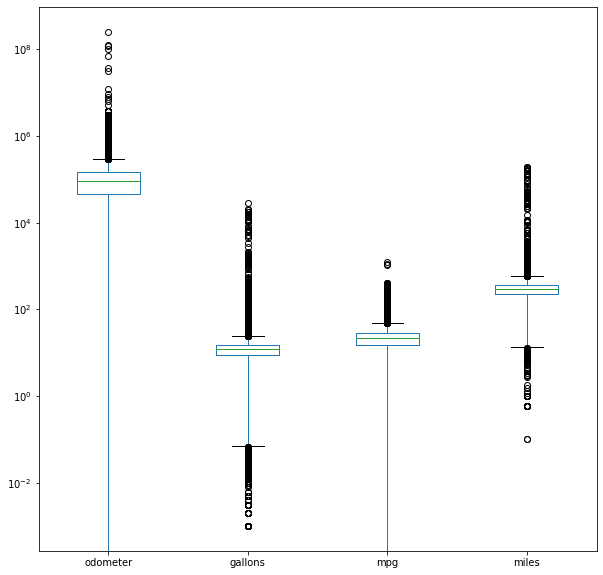

In [81]:
#Boxplots
dataset.plot.box(logy=True,figsize=(10,10))

<AxesSubplot:title={'center':'Histogram for odometer'}, ylabel='Frequency'>

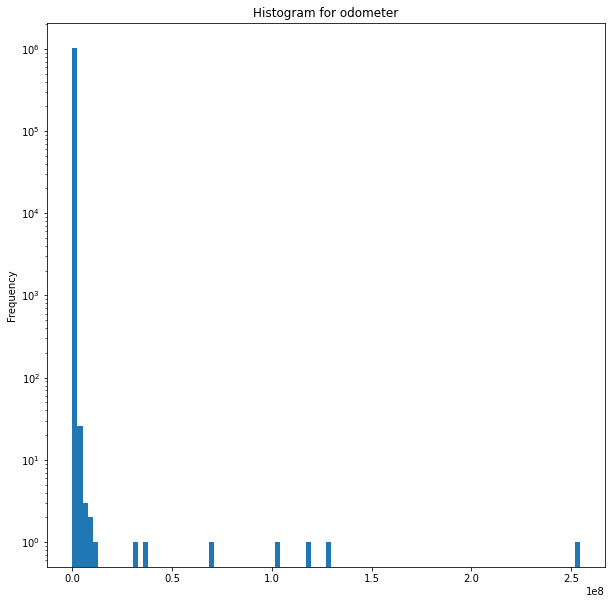

In [82]:
#Assess Distribution
dataset["odometer"].plot.hist(logy=True,figsize=(10,10), title='Histogram for odometer',bins=100)


<AxesSubplot:title={'center':'Histogram for gallons'}, ylabel='Frequency'>

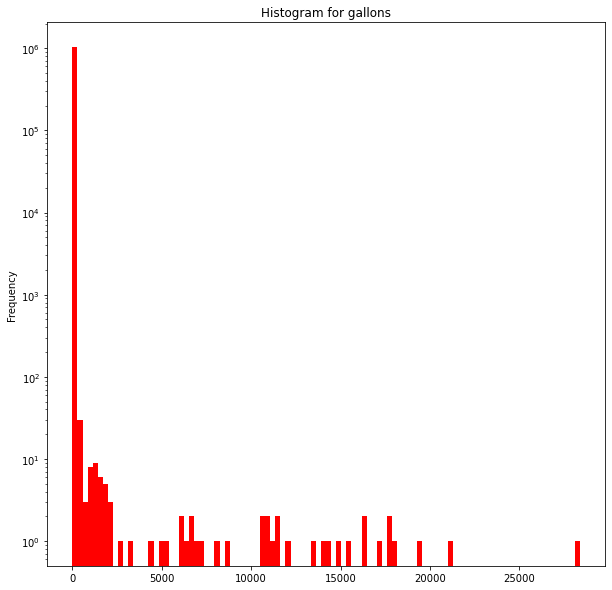

In [83]:
dataset["gallons"].plot.hist(logy=True,figsize=(10,10), title='Histogram for gallons',bins=100,color='red')

<AxesSubplot:title={'center':'Histogram for mpg'}, ylabel='Frequency'>

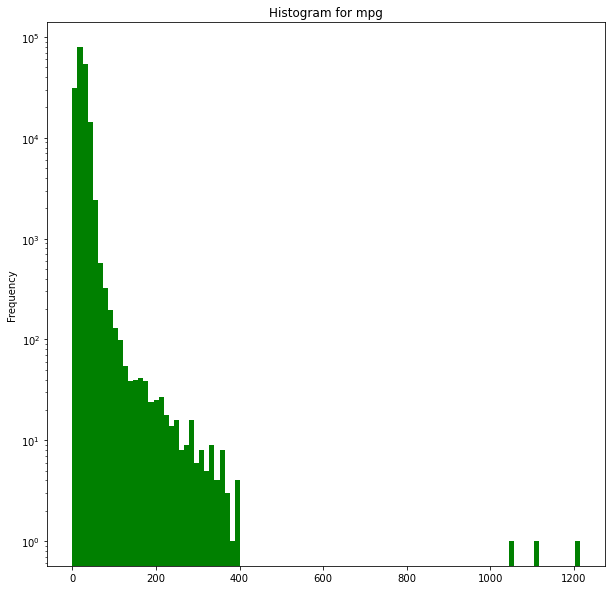

In [84]:
dataset["mpg"].plot.hist(logy=True,figsize=(10,10), title='Histogram for mpg',bins=100,color='green')

<AxesSubplot:title={'center':'Histogram for miles'}, ylabel='Frequency'>

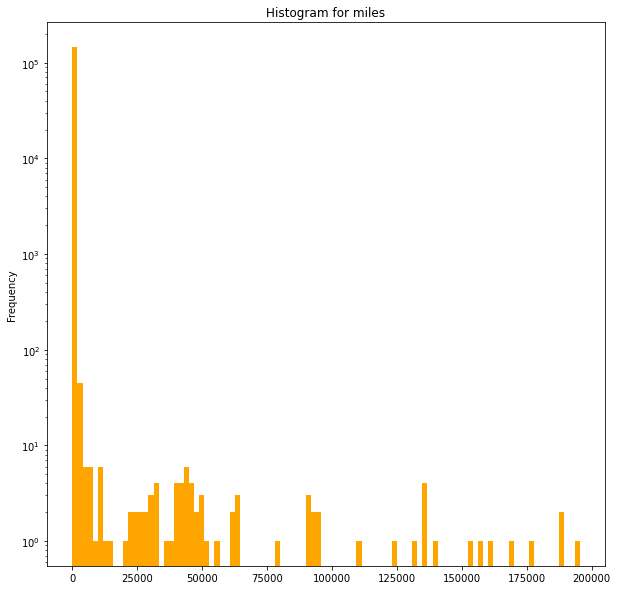

In [85]:
dataset["miles"].plot.hist(logy=True,figsize=(10,10), title='Histogram for miles',bins=100,color='orange')

<h4>Statistical description</h4>

In [86]:
dataset[["miles",'gallons','mpg']].describe()

print("The kurtosis of respective columns are as follows:\n")
display(dataset[["miles",'gallons','mpg']].kurtosis())

print("The skewness of respective columns are as follows:\n")
dataset[["miles",'gallons','mpg']].skew()

The kurtosis of respective columns are as follows:



miles       5464.623120
gallons    52817.061986
mpg          416.448187
dtype: float64

The skewness of respective columns are as follows:



miles       69.144093
gallons    214.821718
mpg          9.760422
dtype: float64

<h3>Adding Constructable Values</h3>

In [87]:
#Construct miles from gallons and mpg
missing_idx = np.where((dataset["miles"].isna() == True)&(dataset["gallons"].isna() == False) & (dataset["mpg"].isna() == False))
display(dataset[['miles','gallons','mpg']].iloc[missing_idx])
dataset["miles"].iloc[missing_idx] = dataset["mpg"].iloc[missing_idx] * dataset["gallons"].iloc[missing_idx]
display(dataset[['miles','gallons','mpg']].iloc[missing_idx])

,miles,gallons,mpg
1,NaN,12.120,31.6
2,NaN,7.991,28.5
3,NaN,10.575,46.8
5,NaN,3.413,29.0
6,NaN,9.044,29.5
...,...,...,...
983033,NaN,12.593,33.3
983035,NaN,11.208,0.0
983036,NaN,13.118,0.0
983038,NaN,13.079,41.2


/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,miles,gallons,mpg
1,382.9920,12.120,31.6
2,227.7435,7.991,28.5
3,494.9100,10.575,46.8
5,98.9770,3.413,29.0
6,266.7980,9.044,29.5
...,...,...,...
983033,419.3469,12.593,33.3
983035,0.0000,11.208,0.0
983036,0.0000,13.118,0.0
983038,538.8548,13.079,41.2


In [88]:
#Construct gallons from miles and mpg
missing_idx = np.where((dataset["gallons"].isna() == True)&(dataset["miles"].isna() == False) & (dataset["mpg"].isna() == False))
display(dataset[['gallons','miles','mpg']].iloc[missing_idx])
dataset["gallons"].iloc[missing_idx] = dataset["miles"].iloc[missing_idx] / dataset["mpg"].iloc[missing_idx]
display(dataset[['gallons','miles','mpg']].iloc[missing_idx])

,gallons,miles,mpg


/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,gallons,miles,mpg


In [89]:
#Construct mpg from miles and gallons
missing_idx = np.where((dataset["mpg"].isna() == True)&(dataset["gallons"].isna() == False)&(dataset["miles"].isna() == False)&(dataset["gallons"] != 0))
display(dataset[['mpg','miles','gallons']].iloc[missing_idx])
dataset["mpg"].iloc[missing_idx] = dataset["miles"].iloc[missing_idx] / dataset["gallons"].iloc[missing_idx]
display(dataset[['mpg','miles','gallons']].iloc[missing_idx])

,mpg,miles,gallons
65536,NaN,219.6,9.095
65538,NaN,297.8,19.166
65552,NaN,397.9,15.107
65568,NaN,586.0,19.797
65573,NaN,212.2,9.395
...,...,...,...
1174836,NaN,491.0,23.825
1174839,NaN,364.9,26.712
1174840,NaN,127.0,6.459
1174851,NaN,262.0,14.857


/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,mpg,miles,gallons
65536,24.145135,219.6,9.095
65538,15.537932,297.8,19.166
65552,26.338783,397.9,15.107
65568,29.600445,586.0,19.797
65573,22.586482,212.2,9.395
...,...,...,...
1174836,20.608604,491.0,23.825
1174839,13.660527,364.9,26.712
1174840,19.662486,127.0,6.459
1174851,17.634785,262.0,14.857


<h3>After Adding Constructable Values</h3>

In [90]:
NaN_count = dataset["miles"].isna().sum()
print("The miles column consist of ",NaN_count," missing values which constitute ",(NaN_count/dataset['miles'].shape[0])*100,"% of the miles column")

NaN_count = dataset["mpg"].isna().sum()
print("The mpg column consist of ",NaN_count," missing values which constitute ",(NaN_count/dataset['mpg'].shape[0])*100,"% of the mpg column")

NaN_count = dataset["gallons"].isna().sum()
print("The gallons column consist of ",NaN_count," missing values which constitute ",(NaN_count/dataset['gallons'].shape[0])*100,"% of the gallons column")

The miles column consist of  868225  missing values which constitute  73.9446036131485 % of the miles column
The mpg column consist of  876525  missing values which constitute  74.65149434998416 % of the mpg column
The gallons column consist of  135484  missing values which constitute  11.538841516800153 % of the gallons column


<h4>Plots</h4>

<AxesSubplot:>

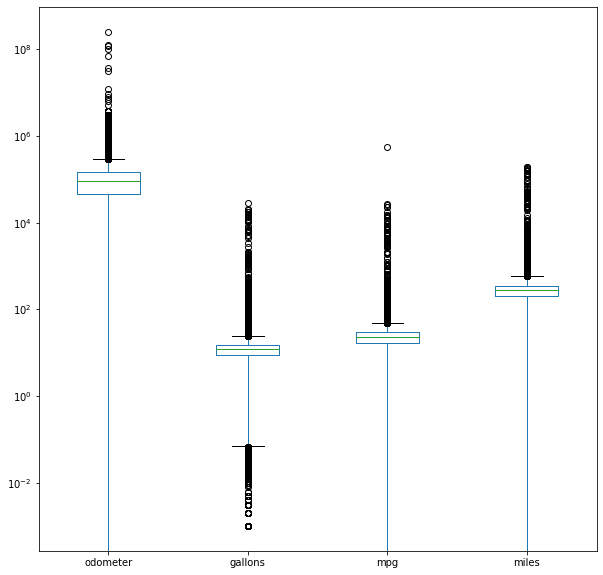

In [91]:
dataset.plot.box(logy=True,figsize=(10,10))

<AxesSubplot:title={'center':'Histogram for gallons'}, ylabel='Frequency'>

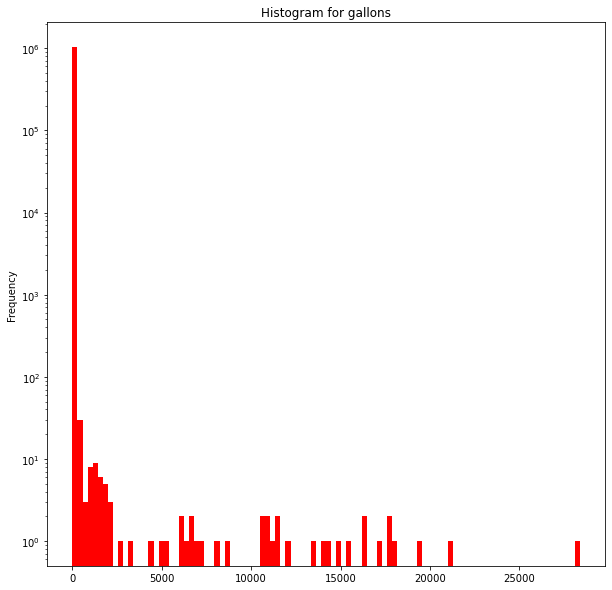

In [92]:
dataset["gallons"].plot.hist(logy=True,figsize=(10,10), title='Histogram for gallons',bins=100,color='red')

<AxesSubplot:title={'center':'Histogram for mpg'}, ylabel='Frequency'>

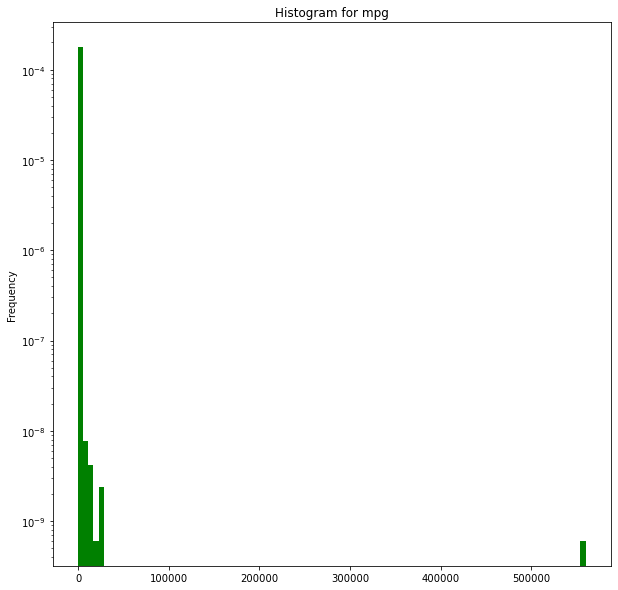

In [93]:
dataset['mpg'].plot.hist(density=True,logy=True,figsize=(10,10), title='Histogram for mpg', bins=100,color='green')

<AxesSubplot:title={'center':'Histogram for miles'}, ylabel='Frequency'>

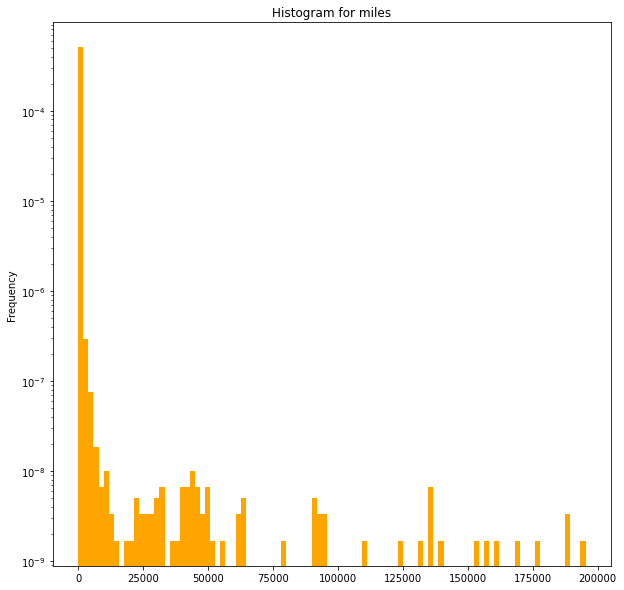

In [94]:
dataset["miles"].plot.hist(density=True,logy=True,figsize=(10,10), title='Histogram for miles',bins=100,color='orange')

<h4>Statistical description</h4>

In [104]:
display(dataset[["miles",'gallons','mpg']].describe())


print("The kurtosis of respective columns are as follows:\n")
display(dataset[["miles",'gallons','mpg']].kurtosis())

print("The skewness of respective columns are as follows:\n")
dataset[["miles",'gallons','mpg']].skew(axis=1)

print("The unique value count of respective columns are as follows:")
display(dataset[["miles"]].value_counts())
display(dataset[["gallons"]].value_counts())
display(dataset[["mpg"]].value_counts())



,miles,gallons,mpg
count,305931.000000,1.038672e+06,297631.000000
mean,298.946391,1.282238e+01,27.283293
std,1336.446779,7.663733e+01,1034.921293
min,0.000000,0.000000e+00,0.000000
25%,201.863800,8.991000e+00,17.236624
50%,277.322100,1.195400e+01,23.000000
75%,352.452150,1.493900e+01,29.801146
max,195321.200000,2.838000e+04,559860.946746


The kurtosis of respective columns are as follows:



miles       11039.728708
gallons     52817.061986
mpg        287701.933210
dtype: float64

The skewness of respective columns are as follows:

The unique value count of respective columns are as follows:


miles   
0.0000      22567
300.0000      293
320.0000      270
280.0000      223
292.0000      222
            ...  
326.3260        1
326.3312        1
326.3319        1
326.3321        1
285.2448        1
Length: 135341, dtype: int64

gallons  
10.567       1846
13.209       1774
5.283        1744
7.925        1694
15.850       1063
             ... 
40.228          1
40.230          1
40.231          1
40.238          1
28380.000       1
Length: 36321, dtype: int64

mpg      
0.000000     23283
20.600000      866
21.200000      861
22.200000      850
21.100000      850
             ...  
28.937247        1
28.937473        1
28.937694        1
28.937729        1
24.821595        1
Length: 112686, dtype: int64

<h3>Conclusion</h3>

<p>From the above statistical description we see that for the miles, gallons and mpg columns we have:</p>

<ul>
    <li>The standard deviation is greater than the mean, this may indicate that there is a significant spread between data points and indicates that the chances of a randomly selected element from the dataset being close to the mean value is very low.</li>
    <li>The kurtosis of the miles column is Leptokurtic(i.e kurtosis > 0), which indicates to us that the distribution is heavy-tailed which signifies the presence of outlier within the data</li>
    <li>The skewness of the miles column is positive which indicates asymmetry in the distribution corresponding to the tail being larger towards the right hand side of the distribution</li>
</ul>

<p>The results make sense because even though there is a significant amount of data, majority of the values for these columns are invalid entries(i.e NaN values) causing a greater spread between the correctly recorded values and hence each column had a standard deviation greater then the mean. Furthermore, when we assess the above histogram on the respective columns we find the distribution is skewed towards the right with a heavy tail indicating outliers. Lastly, the most frequent value in mpg is the value 0 which corresponds to the miles also having the most frequent value being the value 0.

<h1>Feature Engineering</h1>

<h2>7.Total spent</h2>

In [169]:
m = np.where((dataset["total_spent"].isna() == False)&
             (dataset["total_spent"].str[:1]!="$")&
             (dataset["total_spent"].str[:1]!="£")&
             (dataset["total_spent"].str[:3]!="RON")&
             (dataset["total_spent"].str[:3]!="NZ$")&
             (dataset["total_spent"].str[:1]!="€")&
             (dataset["total_spent"].str[:2]!="zł")&
             (dataset["total_spent"].str[:3]!="AU$")&
             (dataset["total_spent"].str[:1]!="₩")&
             (dataset["total_spent"].str[:2]!="Ft")&
             (dataset["total_spent"].str[:3]!="Nkr")&
             (dataset["total_spent"].str[:2]!="R$")&
             (dataset["total_spent"].str[:3]!="CA$")&
             (dataset["total_spent"].str[:5]!="RUB2,")&
             (dataset["total_spent"].str[:1]!="₪")&
             (dataset["total_spent"].str[:2]!="Rp")&
             (dataset["total_spent"].str[:2]!="RM")&
             (dataset["total_spent"].str[:1]!="R")&
             (dataset["total_spent"].str[:3]!="Skr")&
             (dataset["total_spent"].str[:3]!="AR$")&
             (dataset["total_spent"].str[:2]!="TL")&
             (dataset["total_spent"].str[:3]!="CN¥")&
             (dataset["total_spent"].str[:3]!="HK$")&
             (dataset["total_spent"].str[:3]!="Dkr")&
             (dataset["total_spent"].str[:3]!="Ikr")&
             (dataset["total_spent"].str[:3]!="IRR")&
             (dataset["total_spent"].str[:3]!="BGN")&
             (dataset["total_spent"].str[:1]!="฿")&
             (dataset["total_spent"].str[:4]!="din.")&
             (dataset["total_spent"].str[:3]!="AED")&
             (dataset["total_spent"].str[:3]!="ZMW")&
             (dataset["total_spent"].str[:3]!="MKD")&
             (dataset["total_spent"].str[:2]!="KD")&
             (dataset["total_spent"].str[:2]!="S$")&
             (dataset["total_spent"].str[:2]!="BD")&
             (dataset["total_spent"].str[:1]!="₱")&
             (dataset["total_spent"].str[:1]!="₡")&
             (dataset["total_spent"].str[:1]!="₴")&
             (dataset["total_spent"].str[:3]!="Fr.")&
             (dataset["total_spent"].str[:2]!="Kč")&
             (dataset["total_spent"].str[:3]!="CL$")&
             (dataset["total_spent"].str[:3]!="EC$")&
             (dataset["total_spent"].str[:3]!="MXN")&
             (dataset["total_spent"].str[:4]!="CFPF")&
             (dataset["total_spent"].str[:2]!="kn")&
             (dataset["total_spent"].str[:2]!="JD")&
             (dataset["total_spent"].str[:2]!="LE")&
             (dataset["total_spent"].str[:3]!="CO$")&
             (dataset["total_spent"].str[:4]!="FCFA")&
             (dataset["total_spent"].str[:3]!="NT$")&
             (dataset["total_spent"].str[:3]!="BN$")&
             (dataset["total_spent"].str[:3]!="S/.")&
             (dataset["total_spent"].str[:3]!="BYN")&
             (dataset["total_spent"].str[:3]!="TT$")&
             (dataset["total_spent"].str[:3]!="Ksh")&
             (dataset["total_spent"].str[:4]!="PKRs")&
             (dataset["total_spent"].str[:3]!="GY$")&
             (dataset["total_spent"].str[:3]!="CFA")&
             (dataset["total_spent"].str[:3]!="GEL")&
             (dataset["total_spent"].str[:3]!="MMK")&
             (dataset["total_spent"].str[:1]!="¥")&
             (dataset["total_spent"].str[:1]!="₲")&
             (dataset["total_spent"].str[:2]!="J$")&
             (dataset["total_spent"].str[:2]!="KM")&
             (dataset["total_spent"].str[:3]!="MDL")&
             (dataset["total_spent"].str[:4]!="SLRs")&
             (dataset["total_spent"].str[:2]!="N$")&
             (dataset["total_spent"].str[:1]!="₦")&
             (dataset["total_spent"].str[:3]!="ZWL")&
             (dataset["total_spent"].str[:3]!="USh")&
             (dataset["total_spent"].str[:4]!="MURs")&
             (dataset["total_spent"].str[:3]!="MGA")&
             (dataset["total_spent"].str[:3]!="B/.")&
             (dataset["total_spent"].str[:5]!="Bs.F.")&
             (dataset["total_spent"].str[:2]!="SR")&
             (dataset["total_spent"].str[:3]!="GTQ")&
             (dataset["total_spent"].str[:3]!="KHR")&
             (dataset["total_spent"].str[:3]!="TSh")&
             (dataset["total_spent"].str[:3]!="LB£")&
             (dataset["total_spent"].str[:2]!="QR")&
             (dataset["total_spent"].str[:2]!="Br")&
             (dataset["total_spent"].str[:2]!="C$")&
             (dataset["total_spent"].str[:3]!="GH₵")&
             (dataset["total_spent"].str[:3]!="BS$")&
             (dataset["total_spent"].str[:3]!="BWP")&
             (dataset["total_spent"].str[:2]!="Tk")&
             (dataset["total_spent"].str[:3]!="man.")&
             (dataset["total_spent"].str[:3]!="BZ$")&
             (dataset["total_spent"].str[:4]!="Bds$")&
             (dataset["total_spent"].str[:3]!="MAD")&
             (dataset["total_spent"].str[:4]!="man.")&
             (dataset["total_spent"].str[:2]!="Kz")&
             (dataset["total_spent"].str[:4]!="NPRs")&
             (dataset["total_spent"].str[:3]!="OMR")&
             (dataset["total_spent"].str[:3]!="HNL")&
             (dataset["total_spent"].str[:3]!="AMD")&
             (dataset["total_spent"].str[:3]!="MTn")&
             (dataset["total_spent"].str[:1]!="₮")&
             (dataset["total_spent"].str[:3]!="SH£")&
             (dataset["total_spent"].str[:1]!="₫")&
             (dataset["total_spent"].str[:2]!="Af")&
             (dataset["total_spent"].str[:3]!="ALL")&
             (dataset["total_spent"].str[:2]!="DT")&
             (dataset["total_spent"].str[:2]!="VT")&
             (dataset["total_spent"].str[:4]!="MOP$")&
             (dataset["total_spent"].str[:3]!="TMT")&
             (dataset["total_spent"].str[:3]!="KY$")&
             (dataset["total_spent"].str[:3]!="CV$")&
             (dataset["total_spent"].str[:2]!="L$")&
             (dataset["total_spent"].str[:3]!="SY£")&
             (dataset["total_spent"].str[:2]!="Bs")&
             (dataset["total_spent"].str[:3]!="CU$")&
             (dataset["total_spent"].str[:2]!="DA")&
             (dataset["total_spent"].str[:4]!="NAf.")&
             (dataset["total_spent"].str[:3]!="KZT")&
             (dataset["total_spent"].str[:2]!="YR")&
             (dataset["total_spent"].str[:3]!="IQD")&
             (dataset["total_spent"].str[:3]!="KGS"))


dataset["total_spent"].iloc[m]
print("We have extracted all currencies")

Series([], Name: total_spent, dtype: object)

In [175]:
dataset["country"] = dataset['total_spent']

m = np.where((dataset["total_spent"] == False)&(dataset["total_spent"].str[:1] =="$"))

dataset["country"].iloc[m] = "$"

display(dataset.iloc[m])



/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,country


<h2>8.Cost per gallon</h2>

<h1>Feature Selection</h1>